In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
dataFrame = pd.read_csv('D:/project/Titanic-Dataset.csv')
dataFrame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [90]:
dataFrame = dataFrame.drop('PassengerId', axis = 1)

In [91]:
dataFrame.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [92]:
dataFrame = dataFrame.drop('Cabin', axis = 1)

In [93]:
dataFrame['Age'] = dataFrame['Age'].fillna(dataFrame['Age'].mean())

In [94]:
dataFrame.dropna(subset=['Embarked'], inplace=True)

In [95]:
dataFrame['Ticket'].nunique()

680

In [96]:
dataFrame = dataFrame.drop('Ticket', axis = 1)

In [97]:
dataFrame = dataFrame.drop('Name', axis = 1)

In [98]:
sns.set_theme(style="dark")

In [99]:
dataFrame.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


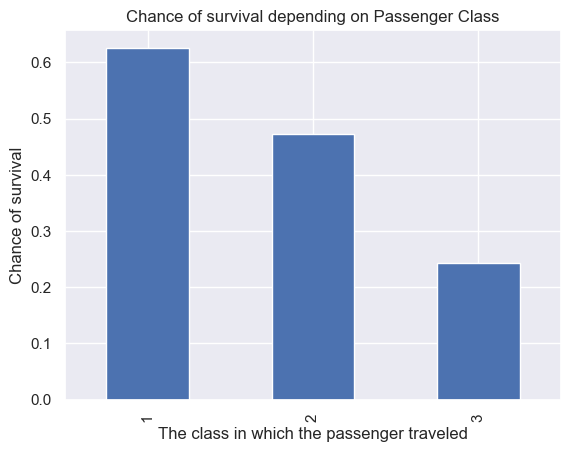

In [100]:
grouped = dataFrame.groupby('Pclass').agg({'Survived': 'mean'})

ax = grouped.plot.bar(
    xlabel = 'The class in which the passenger traveled',
    ylabel = 'Chance of survival',
    grid=True,
    legend = False,
    title = "Chance of survival depending on Passenger Class"
)

plt.show()

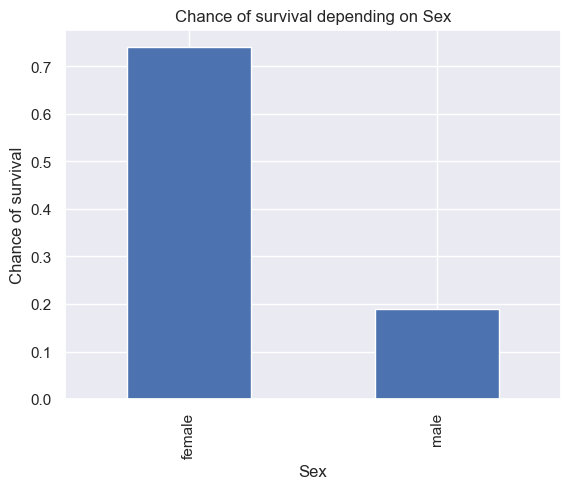

In [101]:
grouped = dataFrame.groupby('Sex').agg({'Survived': 'mean'})

ax = grouped.plot.bar(
    xlabel = 'Sex',
    ylabel = 'Chance of survival',
    grid=True,
    legend = False,
    title = "Chance of survival depending on Sex"
)

plt.show()

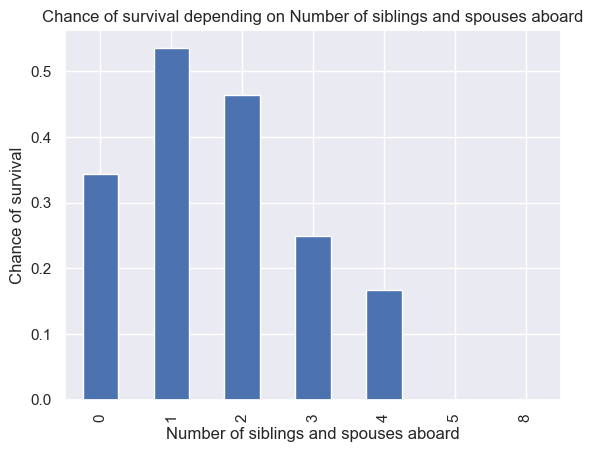

In [65]:
grouped = dataFrame.groupby('SibSp').agg({'Survived': 'mean'})

ax = grouped.plot.bar(
    xlabel = 'Number of siblings and spouses aboard',
    ylabel = 'Chance of survival',
    grid=True,
    legend = False,
    title = "Chance of survival depending on Number of siblings and spouses aboard"
)

plt.show()

In [44]:
dataFrame['Age'].nunique()

89

In [102]:
age_groups = ["0 - 13", "14 - 21",  "22 - 40" , "40+"]

dataFrame["0 - 13"] = 0
dataFrame["14 - 21"] = 0
dataFrame["22 - 40"] = 0
dataFrame["40+"] = 0

dataFrame["0 - 13"] = dataFrame["0 - 13"].where(~(dataFrame["Age"] <= 13), 1)
dataFrame["14 - 21"] = dataFrame["0 - 13"].where(~((dataFrame["Age"] >= 14) & (dataFrame["Age"] <= 21)), 1)
dataFrame["22 - 40"] = dataFrame["0 - 13"].where(~((dataFrame["Age"] >= 22) & (dataFrame["Age"] <= 40)), 1)
dataFrame["40+"] = dataFrame["0 - 13"].where(~(dataFrame["Age"] > 40), 1)

dataFrame


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,0 - 13,14 - 21,22 - 40,40+
0,0,3,male,22.000000,1,0,7.2500,S,0,0,1,0
1,1,1,female,38.000000,1,0,71.2833,C,0,0,1,0
2,1,3,female,26.000000,0,0,7.9250,S,0,0,1,0
3,1,1,female,35.000000,1,0,53.1000,S,0,0,1,0
4,0,3,male,35.000000,0,0,8.0500,S,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,0,0,1,0
887,1,1,female,19.000000,0,0,30.0000,S,0,1,0,0
888,0,3,female,29.699118,1,2,23.4500,S,0,0,1,0
889,1,1,male,26.000000,0,0,30.0000,C,0,0,1,0


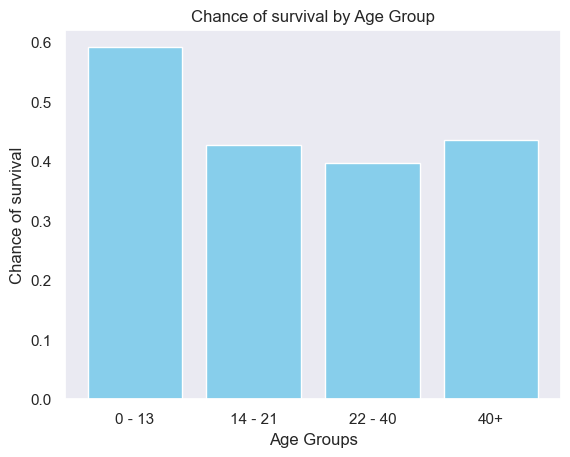

In [125]:
age_groups = ["0 - 13", "14 - 21", "22 - 40", "40+"]
survival_rates = {}

for group in age_groups:
    count = dataFrame[(dataFrame[group] == 1) & (dataFrame['Survived'] == 1)].shape[0] / dataFrame[dataFrame[group] == 1].shape[0]
    survival_rates[group] = count

plt.bar(survival_rates.keys(), survival_rates.values(), color='skyblue')

plt.xlabel('Age Groups')
plt.ylabel('Chance of survival')
plt.title('Chance of survival by Age Group')

plt.show()


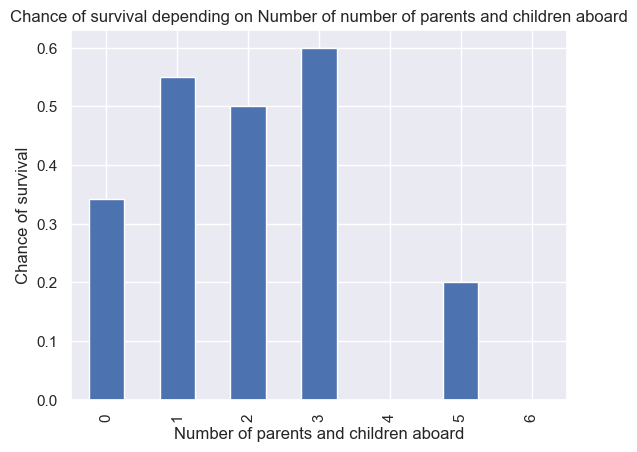

In [43]:
grouped = dataFrame.groupby('Parch').agg({'Survived': 'mean'})

ax = grouped.plot.bar(
    xlabel = 'Number of parents and children aboard',
    ylabel = 'Chance of survival',
    grid=True,
    legend = False,
    title = "Chance of survival depending on Number of number of parents and children aboard"
)

plt.show()

In [36]:
highest_value = dataFrame['Fare'].max()
print(f'Highest value: {highest_value}')

lowest_value = dataFrame['Fare'].min()
print(f'Lowest value: {lowest_value}')

Highest value: 512.3292
Lowest value: 0.0


In [37]:
df = dataFrame
df.loc[df['Fare'] <= 100, 'price range'] = '0 - 100'
df.loc[((df['Fare'] > 100) & (df['Fare'] <= 200)), 'price range'] = '101 - 200'
df.loc[((df['Fare'] > 200) & (df['Fare'] <= 300)), 'price range'] = '201 - 300'
df.loc[((df['Fare'] > 300) & (df['Fare'] <= 400)), 'price range'] = '301 - 400'
df.loc[(df['Fare']) > 400, 'price range'] = '400+'

<Axes: title={'center': 'Chance of survival depending on Number of number of Ticket fare'}, xlabel='Ticket fare', ylabel='Chance of survival'>

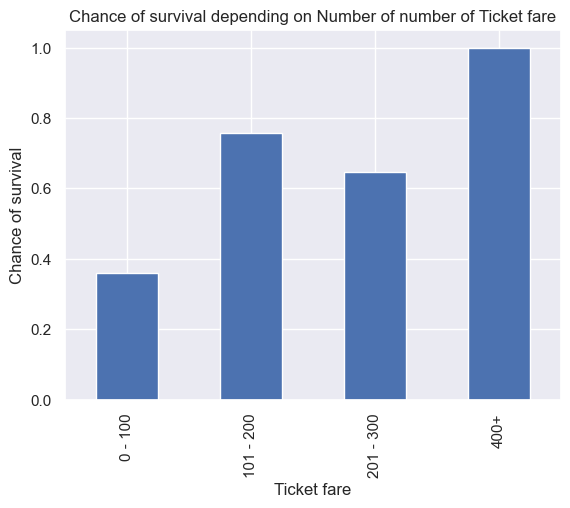

In [38]:
(df.groupby('price range')
 .agg({'Survived' : 'mean'})
 .plot.bar
(
    xlabel = 'Ticket fare',
    ylabel = 'Chance of survival',
    grid=True,
    legend = False,
    title = "Chance of survival depending on Number of number of Ticket fare"
))

<Axes: title={'center': 'Chance of survival depending on Number of Port of Embarkation (the place where the passenger boarded the ship)'}, xlabel='Port of Embarkation', ylabel='Chance of survival'>

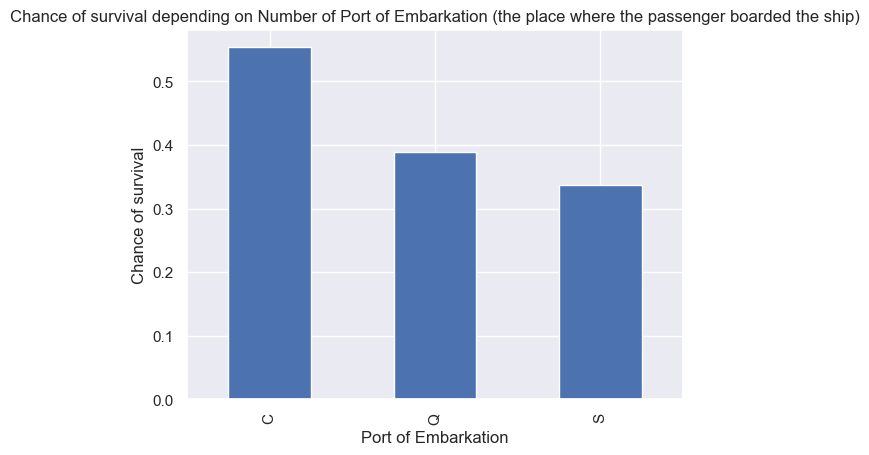

In [39]:
(df.groupby('Embarked')
 .agg({'Survived' : 'mean'})
 .plot.bar
(
    xlabel = 'Port of Embarkation',
    ylabel = 'Chance of survival',
    grid=True,
    legend = False,
    title = "Chance of survival depending on Number of Port of Embarkation (the place where the passenger boarded the ship)"
))